Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [79]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
symbol = 'BTCUSDT'
from_timestamp = int(datetime.datetime(year=2022,month=1,day=1).timestamp())
to_timestamp = int(datetime.datetime(2022,12,31).timestamp())
wallex = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={from_timestamp}&to={to_timestamp}'
r= requests.get(wallex)
r

<Response [200]>

In [47]:
data = r.json()
df = pd.DataFrame({"time":data['t'],"open":data['o'],"close":data['c'],"low":data['l'],"high":data['h']},dtype='float32')
df

,time,open,close,low,high
0,1.640984e+09,46850.000000,46850.000000,46850.000000,46850.000000
1,1.640988e+09,47265.699219,46657.449219,46400.000000,47265.699219
2,1.640992e+09,46100.000000,46000.000000,46000.000000,46176.789062
3,1.640995e+09,45900.000000,45800.109375,45800.109375,45900.000000
4,1.640999e+09,46124.851562,46146.429688,45946.281250,46155.710938
...,...,...,...,...,...
8586,1.672416e+09,16389.689453,16568.609375,16388.689453,16568.609375
8587,1.672420e+09,16568.609375,16568.609375,16568.609375,16568.609375
8588,1.672423e+09,16504.179688,16560.220703,16504.179688,16566.660156
8589,1.672427e+09,16568.609375,16568.609375,16568.609375,16568.609375


In [48]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [49]:
df.set_index('time', inplace=True)

In [50]:
df['Mean'] = df.mean(axis=1)
df

,open,close,low,high,Mean
time,,,,,
2021-12-31 21:00:48,46850.000000,46850.000000,46850.000000,46850.000000,46850.000000
2021-12-31 22:00:32,47265.699219,46657.449219,46400.000000,47265.699219,46897.214844
2021-12-31 23:00:16,46100.000000,46000.000000,46000.000000,46176.789062,46069.195312
2022-01-01 00:00:00,45900.000000,45800.109375,45800.109375,45900.000000,45850.054688
2022-01-01 00:59:44,46124.851562,46146.429688,45946.281250,46155.710938,46093.320312
...,...,...,...,...,...
2022-12-30 16:00:00,16389.689453,16568.609375,16388.689453,16568.609375,16478.898438
2022-12-30 16:59:44,16568.609375,16568.609375,16568.609375,16568.609375,16568.609375
2022-12-30 17:59:28,16504.179688,16560.220703,16504.179688,16566.660156,16533.808594


Text(0, 0.5, 'Bitcoin price')

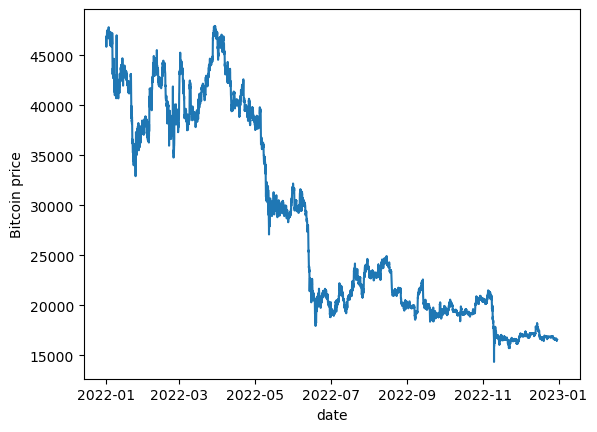

In [51]:
plt.plot(df.index,df['Mean'])
plt.xlabel('date')
plt.ylabel('Bitcoin price')

In [52]:
df['diff'] = df['Mean'].diff()
result = adfuller(df['diff'].dropna())
p_value = result[1]
if p_value < 0.05:
    print(f'Is the differenced series stationary?\n {True}')
else:
    print(f'Is the differenced series stationary?\n {False}')

Is the differenced series stationary?
 True


In [56]:
model =ARIMA(df['Mean'], order=(2,1,3))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Mean   No. Observations:                 8591
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -59696.573
Date:                Mon, 09 Oct 2023   AIC                         119405.146
Time:                        22:46:13   BIC                         119447.496
Sample:                             0   HQIC                        119419.590
                               - 8591                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4933      0.005   -291.663      0.000      -1.503      -1.483
ar.L2         -0.9793      0.005   -209.525      0.000      -0.988      -0.970
ma.L1          1.3325      0.006    234.332      0.0

In [61]:
forecast = model_fit.forecast(steps=3)
forecast

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8591    16566.167385
8592    16565.971435
8593    16564.130379
Name: predicted_mean, dtype: float64

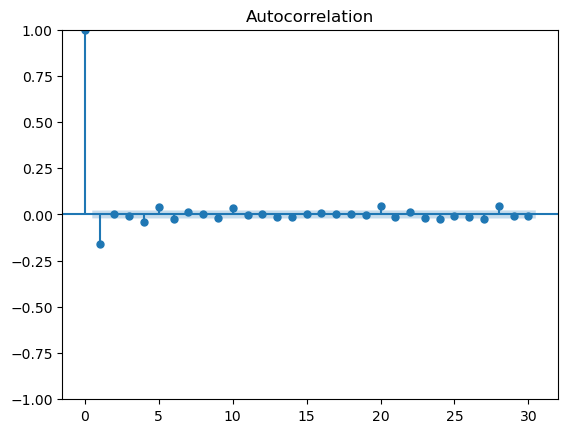

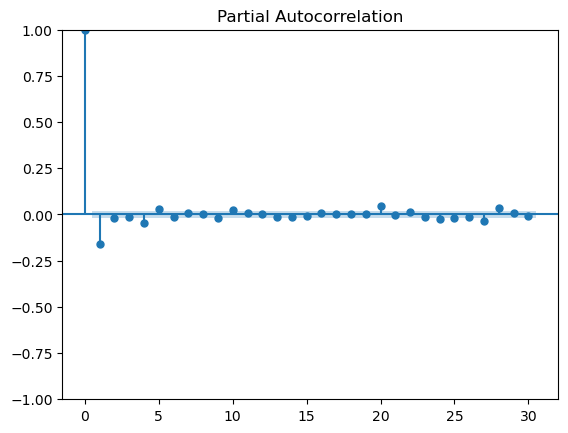

In [75]:
plot_acf(df['diff'].dropna(),lags=30)
plot_pacf(df['diff'].dropna(),lags=30)
plt.show()

In [91]:
actual_prices = df['Mean'][-3:].to_numpy()
mae = mean_absolute_error(actual_prices, forecast)
rmse = np.sqrt(mean_squared_error(actual_prices, forecast))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 11.785528862568754
Root Mean Squared Error: 18.745484589598718


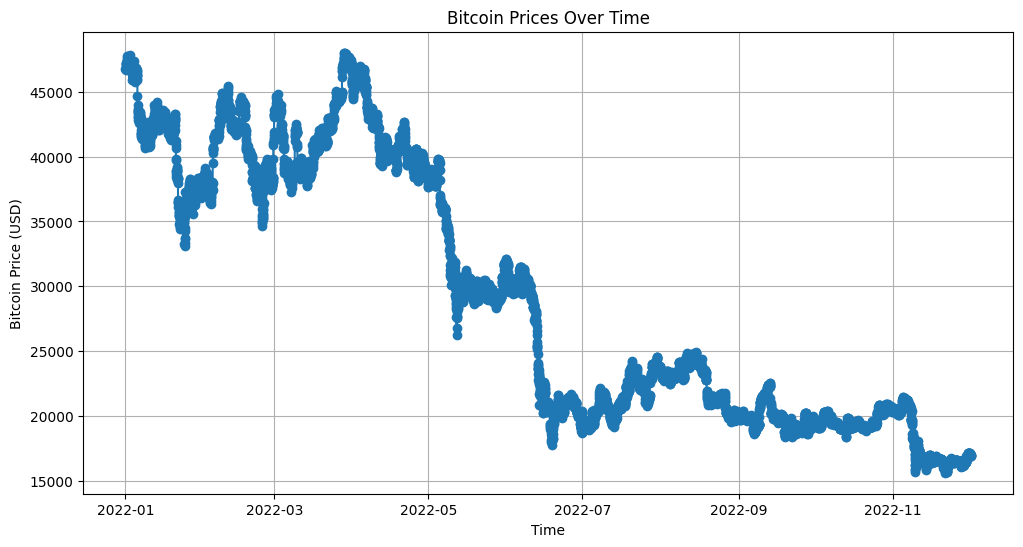

<Figure size 1200x600 with 0 Axes>

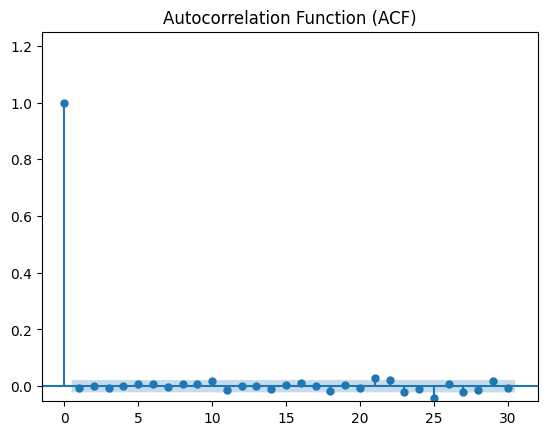

<Figure size 1200x600 with 0 Axes>

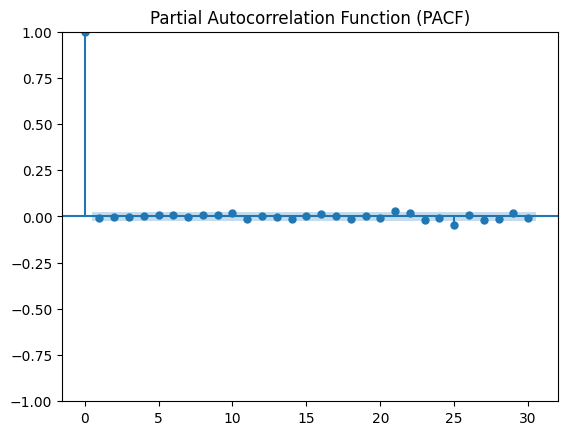

Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecast for the next 3 hour (USD):
[8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64]
[16923.77 16967.91 16980.08]

Model Evaluation:
hour 1:
MAE: 56.25 USD
RMSE: 56.25 USD
hour 2:
MAE: 12.11 USD
RMSE: 12.11 USD
hour 3:
MAE: 0.06 USD
RMSE: 0.06 USD
